O abandono de clientes de um determinado produto ou serviço é conhecido como churn. Com o aumento recente de opções de cartões de crédito e o surgimento de bancos digitais, muitos clientes tem abandonado seus cartões anteriores emitidos pelo banco em que são correntistas. Considere para esta questão dados de abandono de cartão de crédito em um certo banco. Como, em geral, dados de abandono são fortemente desbalancedos, foi retirada uma amostra aproximadamente balanceada de clientes que abandonaram e não abandonaram seu cartão emitido pelo banco, supondo que esse processo de amostragem não traz pejuízo à análise. Os dados da amostra são apresentados no arquivo do link churn.csv, que tem as seguintes informações:

- Id do cliente

- sexo (1: feminino, 0: masculino)

- idade (em anos completos)

- financiamento (1: se o cliente possuía algum financiamento pelo banco, 0: caso contrário)

- desconto (percentual concedido de desconto na anuidade ao cliente)

- churn: abandono (1: sim, 0: não)

3. Por meio de gráficos (análise exploratória), investigue a associação entre os pares de variáveis sexo e churn, idade e churn, financiamento e churn e finalmente desconto e churn. Note que algumas variáveis estão codificadas em 0 e 1 mas são qualitativas. Fique atento à forma de analisar a associação entre duas variáveis qualitativas. Comente os resultados obtidos.

4. Ajuste um modelo de regressão logística para o abandono (churn) de clientes, com intercepto e como preditoras o sexo, a idade, o financiamento e o desconto. Esse modelo é um MLG com resposta binomial e função de ligação logito. Ordene as preditoras da maior para a menor significância marginal (quanto menor o valor-p, maior a significância marginal). Analise o impacto das duas preditoras de maior significância no abandono de clientes, utilizando a razão de chances. Os resultados confirmam a investigação inicial da Questão 3? Comente sobre os resultados obtidos. Para este item, considere que não é necessário fazer a seleção de atributos ou dividir a base em treinamento e teste. 

A entrega deve ser feita com o upload de um notebook inteiramente executado .ipynb, com os códigos usados para a obtenção dos resultados. Este notebook deve estar comentado de forma a facilmente identificar os códigos de cada análise. Utilize seu nome no arquivo e o número da questão, exemplo: "fulanodetal03.ipynb"

Atenção, se constatado plágio, a questão será zerada.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/Users/jp.ducatti/Documents/mba_data_science_usp/estatistica_ciencia_dados/avaliacao_final/churn.csv')
df.drop(['Id','seguro'],axis=1, inplace = True) #removendo features não utilizadas na análise
df.head()

,sexo,idade,financiamento,desconto,churn
0,1,34,0,0.0,0
1,0,35,0,0.0,0
2,0,52,1,0.0,0
3,1,19,0,0.3,1
4,0,32,0,0.0,1


# Análise Exploratória

In [4]:
df.describe()

,sexo,idade,financiamento,desconto,churn
count,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.346847,39.058559,0.409910,0.114865,0.400901
std,0.477042,12.100305,0.492928,0.234771,0.491189
min,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,0.000000,0.000000,0.000000
50%,0.000000,38.500000,0.000000,0.000000,0.000000
75%,1.000000,49.000000,1.000000,0.100000,1.000000
max,1.000000,60.000000,1.000000,1.000000,1.000000


Pelo describe verifica-se que: há mais homens que mulheres no dataframe
e um pouco menos da metade do database tem financiamento

Text(0.5, 1.0, 'Matriz de correlações de Pearson')

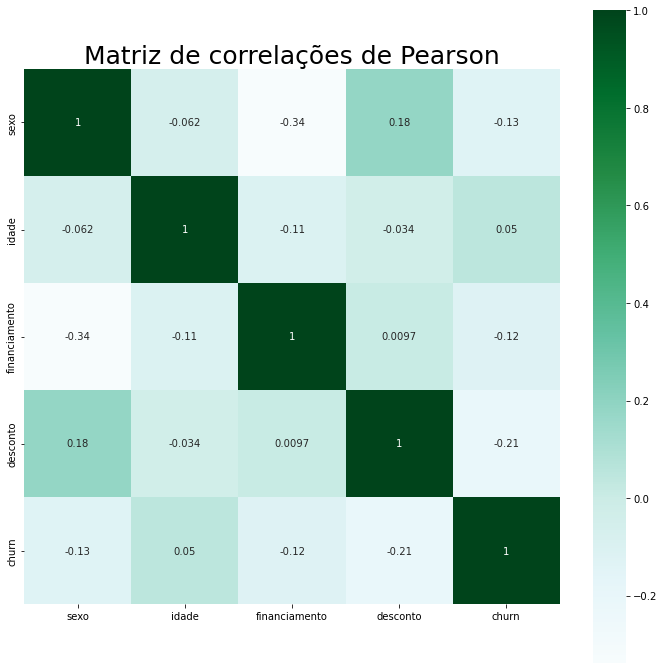

In [5]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(method='pearson'),annot=True, square=True, cmap="BuGn")

plt.title('Matriz de correlações de Pearson',fontsize=25)

Text(0.5, 1.0, 'Matriz de correlações de Spearman')

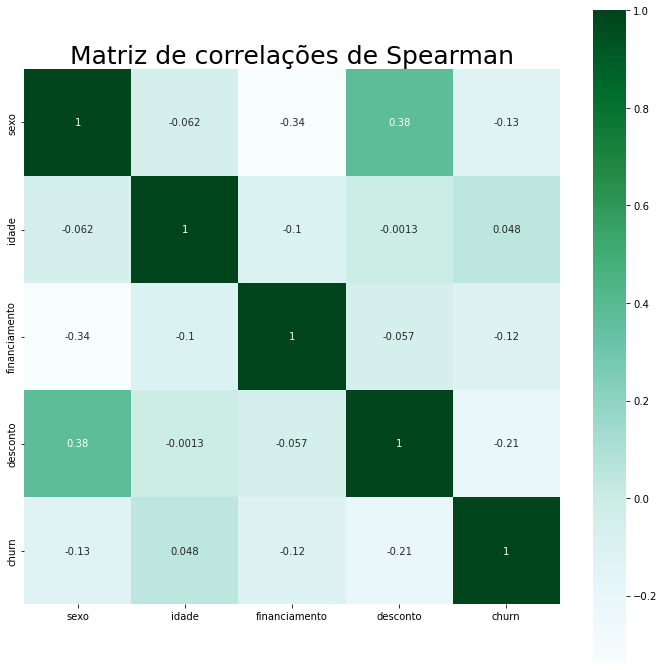

In [6]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(method='spearman'),annot=True, square=True, cmap="BuGn")

plt.title('Matriz de correlações de Spearman',fontsize=25)

Dentre as variáveis 'desconto' e 'idade' que não são qualitativas, a correlação de Pearson e de Spearman mostram que ambos os atributos apresentam baixa força de correlação com o Churn de cartão (valores abaixo de 0.3). Uma de cada atributo com o 'churn' segue nas linhas abaixo.

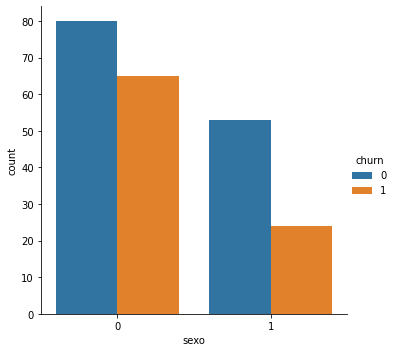

In [7]:
sns.catplot(x ='sexo', hue ='churn', kind ="count", data = df);

<AxesSubplot:xlabel='churn', ylabel='sexo'>

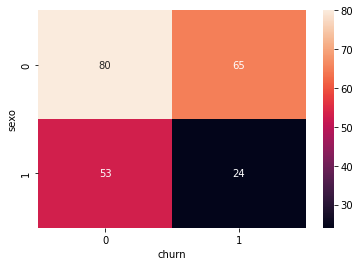

In [8]:
group = df.groupby(['sexo', 'churn'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

Analisando a relação entre as variáveis sexo e churn, verifica-se que o sexo masculino apresenta, proporcionalmente, mais pessoas com churn do que o sexo feminino. 45% dos indivíduos masculinos apresentam churn contra 31% do sexo feminino que apresenta churn.

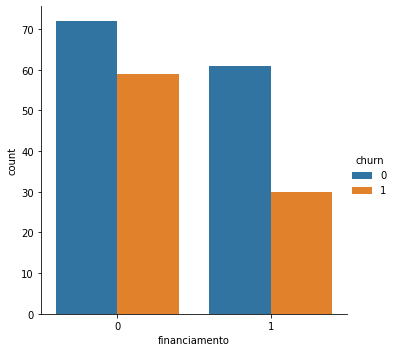

In [9]:
sns.catplot(x ='financiamento', hue ='churn', kind ="count", data = df);

<AxesSubplot:xlabel='churn', ylabel='financiamento'>

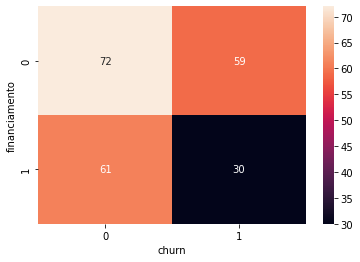

In [10]:
group = df.groupby(['financiamento', 'churn'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

Analisando financiamento e churn, pelo histograma verifica-se um indicativo que ter financiamento não apresenta forte influência para causar um churn, já que proporcionalmente há mais casos de churn em indivíduos sem financiamento.

Do total de indivíduos sem financiamento, 45% apresentam churn enquanto que indívidos com financiamento que tenham churn é de 33%

<AxesSubplot:xlabel='churn', ylabel='idade'>

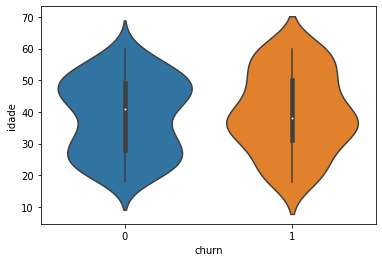

In [11]:
sns.violinplot(x ='churn', y ='idade', data = df, split = True)

Em relação a idade e churn, verifica-se que os casos de churn são mais comuns com um idade entre 35 e 40 anos enquanto os casos de não-churn são mais relevantes em jovens (idade abaixo de 30 anos) e pessoas acima de 45 anos.

<AxesSubplot:xlabel='idade_range', ylabel='churn'>

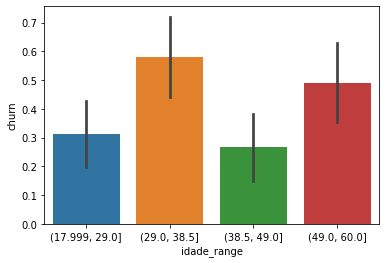

In [12]:
df['idade_range'] = pd.qcut(df['idade'], 4)
 
# Barplot - Shows approximate values based on the height of bars.
sns.barplot(x ='idade_range', y ='churn',
data = df)

Pelo gráfico acima, pode-se ver que o range de idade entre 29 e 38.5 anos apresentam uma média de todos os casos de churn e não-churn mais próximo de 1, indicando maior quantidade de invidívudos com essa característica.

<AxesSubplot:xlabel='churn', ylabel='desconto'>

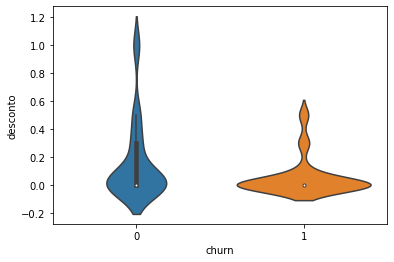

In [13]:
sns.violinplot(x ='churn', y ='desconto', data = df, split = True)

Churn e desconto não apresentam um indicativo de claro de relação. Aparentemente, apenas para altos valores de desconto (acima de aproximadamente 0.6) há uma relação negativa com churns. 

Abaixo desse valor, aparentemente desconto não apresenta forte influencia no 'churn'.

Resumo da análise exploratória:
 - O sexo influencia o churn: indíviduos masculinos apresentam mais casos de churn que indíviduos femininos;
 - Financiamento não aparenta influenciar fortmente o churn;
 - A idade influencia o churn: pessoas com idade próxima de 40 anos apresentam maior chance de churn;
 - Desconto abaixo de 0.6 não influencia fortemente o churn

# Modelo de Regressão Logística

Modelo: MLG com intercepto, resposta = binomial, função de ligação = logito
Preditores: sexo, idade, financiamento e desconto

In [14]:
import statsmodels.api as sm
from scipy import stats


In [15]:
# criando uma coluna de constante para ser o intercepto
n=len(df)
df.loc[:,'intercepto'] = np.ones(n).reshape(n,1)
df.drop(['idade_range'], axis = 1, inplace=True)
df.head(5)

,sexo,idade,financiamento,desconto,churn,intercepto
0,1,34,0,0.0,0,1.0
1,0,35,0,0.0,0,1.0
2,0,52,1,0.0,0,1.0
3,1,19,0,0.3,1,1.0
4,0,32,0,0.0,1,1.0


In [16]:
preditores = df[['intercepto', 'sexo', 'idade', 'financiamento','desconto']]
resposta = df[['churn']]

In [17]:
glm_binom = sm.GLM(resposta, preditores, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                  222
Model:                            GLM   Df Residuals:                      217
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -139.94
Date:                Mon, 06 Jun 2022   Deviance:                       279.87
Time:                        21:47:09   Pearson chi2:                     221.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercepto        0.1775      0.548      0.324

Pelo modelo desenvolvido, verifica-se a seguinte ordem de preditores pela significância marginal, do maior para menor:

desconto > financiamento > sexo > idade

Dentre os 4 atributos, a idade, poderia ser removida do modelo dado o valor do p-value alto (= 0.763) mostrando que a variável não apresenta forte evidência que sugira influência na variável resposta. Na análise exploratório foi indicado que há uma influência a depender do range de idade olhado, contudo o modelo infomar que o atributo em questão não é estatisticamente relevante.

Possivelmente, necessitamos de mais observações com o atributo 'idade' para confirmar o que foi falado na análise exploratória.

Apesar de ter p-value abaixo de 0.05, a preditora 'sexo' seria beneficiada de mais amostras para retornar uma informação mais acurada sobre sua influência no churn.

A única variável preditora que apresentou divergência do modelo e o esperado pela análise exploratória foi a 'idade', que não é estatisticamente relevante (alto p-value).

Todas as outras preditoras (sexo, financiamento e desconto), concordam com o mostrado pela análise exploratória:
 - 'sexo' com coeficiente -0.6725 indica uma razão de chance de 0.51, ou seja, indivíduos femininos (sexo = 1), multiplicam por 0.51 a variável churn, diminuindo sua chance;
 - 'financiamento' com coeficiente de -0.7518 apresenta uma razão de chance de 0.47, ou seja, o churn é multiplicado por 0.47 quando o indivíduo apresenta financiamento;
 - 'desconto' com coeficiente -2.0272 e razão de chance 0.13 indica que o desconto pouco infuencia o índice de churn, principalmente quando se trata de descontos baixos (próximo de 0).


Abaixo, a análise das preditoras estatisticamente mais significantes, desconto e financiamento, pela razão de chances.


In [18]:
pred_desconto = np.exp(-2.0272)
pred_financiamento = np.exp(-0.7518)

print('Razão de chances --> Desconto = %0.2f e Financiamento = %0.2f' %(pred_desconto,pred_financiamento))

Razão de chances --> Desconto = 0.13 e Financiamento = 0.47
